# Lab 05 - Data Visualization I

Name: Kartikeya Sharma  
Class: CSCI 349 - Intro to Data Mining  
Semester: 2021SP  
Instructor: Brian King  

In [1]:
# allow function autocomplete and 
# populating Javadocs features to work
%config Completer.use_jedi = False

In [2]:
from sys import version
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
        
print("Python version: ", version)
print()
print("np version: ", np.__version__)
print("pd version: ", pd.__version__)
print("mpl version: ", mpl.__version__)
print("sns version: ", sns.__version__)

Python version:  3.8.8 (default, Feb 24 2021, 13:46:16) 
[Clang 10.0.0 ]

np version:  1.19.2
pd version:  1.2.3
mpl version:  3.3.4
sns version:  0.11.1


### Part I - matplotlib

#### 1) [M] Read https://matplotlib.org/stable/tutorials/introductory/usage.html up to the section titled Backends. (NOTE: at the end, you will read about a Jupyter widget library called ipympl. Do NOT install this! Skip these instructions!) Then, summarize the following important parts of a plot: <br/> <br/> &emsp; a. Figure <br/> &emsp; b. Axes <br/> &emsp; c. Axis <br/> &emsp; d. Artist

**a. Figure**<br/>
In matplotlib, a Figure object is, generally speaking, the whole window within the graphical user interface, which is also described as a figure.<sup>1 2</sup> Another way to think about it is the broadest container to store the entities, which are more or less essentially a collection of smaller Python objects, needed for creating a visualization or plot.<sup>4</sup> (In the context of Jupyter as well, this can also be a widget.<sup>1</sup>) 

Features of the figure like its dimensions or resolution can be defined through the Figure object.<sup>2</sup> Each figure, for the most part, has one or more Axes objects; it is possible for a figure to have no Axes objects.<sup>1</sup>

**b. Axes**<br/>
An Axes object in matplotlib contains the data to be/being plotted and the area where its visual lies.<sup>1 5</sup> Contained within it are definitions of points within their respective coordinate system, which would be x-y, x-y-z, r-theta, etc.<sup>1</sup> Each Axes object may only be associated with one figure.<sup>1</sup>

Although an Axes object can be analogous to a plot, it should be noted that Axes objects, unlike subplots, manipulate the spatial parameters of a plot (where inside figure, placement within another plot, etc.).<sup>2 3 4</sup>

**c. Axis**<br/>
An Axis object within matplotlib is like a "number-line-like [object]."<sup>1</sup> There are typically two or three Axis objects within an Axes object.<sup>1</sup> It contains a comprehensive interface for handling 'ticks' and 'tick labels.'<sup>1 6</sup>

**d. Artist**<br/>
A matplotlib Artist object has the role of crafting the figure and makes its components, including lines and text, visible to the user.<sup>1</sup> Technically speaking, it serves as an "abstract base class" for those components.<sup>7</sup> (It draws to something called the canvas, which is primarily on the backend of matplotlib and not an area controlled by the user.<sup>1</sup>) Each Artist object are generally bound to one and only one Axes object.<sup>1</sup>

Sources:
1. https://matplotlib.org/stable/tutorials/introductory/usage.html
2. https://scipy-lectures.org/intro/matplotlib/index.html
3. https://stackoverflow.com/questions/45048255/matplotlib-subplots-vs-axes-vs-axis-singular-plural
4. https://realpython.com/python-matplotlib-guide/
5. https://www.tutorialspoint.com/matplotlib/matplotlib_axes_class.htm
6. https://matplotlib.org/stable/api/axis_api.html
7. https://matplotlib.org/stable/api/artist_api.html

#### 2) [P] Set the seed of numpy's RNG to 10 with the following: <br/><br/> ```np.random.seed(10)```

np.random.seed(10)

#### 3) [P] Create a dataframe named df_uniform that contains 2000 observations. It should have two variables, named x and y. For each observation, x should be generated from a uniform distribution between 10 and 90, and y should be generated from a uniform between 20 and 80. Show the head() of the dataframe.

In [3]:
# Assumption: 'contains 2000 observations' means 2000 observations
# throughout the whole pd.DataFrame object

def gen_two_var_uniform_dists_df(
    x_lower_limit = 10,
    x_upper_limit = 90,
    y_lower_limit = 20,
    y_upper_limit = 80,
    num_observations = 2000):
    
    rng = np.random.default_rng()
    
    x = rng.uniform(low=x_lower_limit, 
                    high=x_upper_limit, 
                    size=num_observations)
    y = rng.uniform(low=y_lower_limit, 
                    high=y_upper_limit, 
                    size=num_observations)
    
    df_uniform = pd.DataFrame(data={'x': x,
                                    'y': y})
    
    return df_uniform

df_uniform = gen_two_var_uniform_dists_df()

df_uniform.head()

,x,y
0,60.504229,69.509795
1,85.642127,32.703088
2,14.800461,73.435430
3,87.511796,31.057378
4,50.508672,75.137835


#### 4) [M] What is a scatterplot? What does it show? What type of data is it used for? Is it good for one variable, or more?

*There are many types of scatterplots, such as scatter with marginal point, connected scatter, grouped scatter.<sup>1</sup> Also, I am sure that scatterplots can be done in more than 2 dimensions. I am only going to talk about the basic case(s) for the sake of simplicity.*

scatterplot is a mathematical graph that displays data that sets of points across two variables.<sup>1</sup> It shows "a collection of points" and their relative locations to one another along two, typically scaled, axes.<sup>2</sup> A scatterplot plots data that is in the form of coordinates of two variables, typically numeric, that are not ordered (along two axes).<sup>3 4</sup> It is good for two (numeric) variables, and perhaps three or so categorical variables in the context of matplotlib, including but not limited to point size, point color, point shape (data set could be one of those categorical variables represented by one of those visual point attributes).<sup>5</sup>

Sources:
1. https://www.mathsisfun.com/data/scatter-xy-plots.html
2. https://pythonspot.com/matplotlib-scatterplot/
3. https://www.data-to-viz.com
4. https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
5. Discussion with Prof. King on 4/7/2021 (about point size, point color, point shape)

#### 5) [P] Generate a scatterplot of the data using matplotlib's scatter method. The tutorial and examples for matplotlib have plenty of examples that are very close to what you need. Your plot must: <br/><br/>&emsp;a. Have a title<br/>&emsp;b. Label both axes with "x" and "y" respectively<br/>&emsp;c. Change the x and y axis to display between 0 and 100<br/>&emsp;d. Change the default point size<br/>&emsp;e. Change the default color of the point<br/>&emsp;f. Display a grid

In [4]:
def two_var_scatter_plt_on_figure(
    df,
    x_col_name = 'x',
    y_col_name = 'y',
    fig = None,
    plot_loc = (1,1,1),
    sharex_on = True,
    label = None,
    title = None,
    x_axis_label = "x",
    y_axis_label = "y",
    x_min = 0,
    x_max = 100,
    y_min = 0,
    y_max = 100,
    pt_size = 20,
    color = "k", # black
    grid_is_on = True
):

    if fig is None:
        fig = plt.figure()
        sharex=None
    elif sharex_on:
        sharex=fig.axes[0]
    else:
        sharex=None
        
    
        
    
    try:
        axes_to_plot_on = fig.axes[plot_loc[2]-1]
    except IndexError:
        axes_to_plot_on = fig.add_subplot(plot_loc[0],
                                          plot_loc[1],
                                          plot_loc[2],
                                          sharex=sharex)
    except:
        raise Exception(
            "Exception: another exception occurred while trying" +\
            "to plot at the specified ")
    
    
    
    
    # x_y_pair[0] are the x values
    # x_y_pair[1] are the y values
    # includes changing of default point size and color
    axes_to_plot_on.scatter(df[x_col_name].to_numpy(), 
                            df[y_col_name].to_numpy(), 
                            s=pt_size, 
                            c=color,
                            label=label)
    
    if label is not None:
        axes_to_plot_on.legend(loc='upper left')
    
    if title is not None:
        axes_to_plot_on.set_title(title)
    axes_to_plot_on.set_xlabel(x_axis_label)
    axes_to_plot_on.set_ylabel(y_axis_label)
    axes_to_plot_on.set_xlim(x_min, x_max)
    axes_to_plot_on.set_ylim(y_min, y_max)
    axes_to_plot_on.grid(grid_is_on)
    return fig




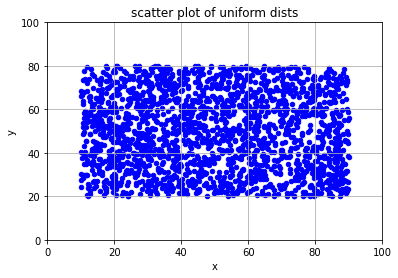

In [5]:
fig = two_var_scatter_plt_on_figure(df_uniform,
                                    title = "scatter plot " + \
                                             "of uniform dists",
                                    color = 'b')

#### 6) [P] Generate a data frame called df_normal with 2000 observations, two variables names x and y again. This time, x should be generated from a normal distribution with mean 50 and standard deviation 15, and y with mean 50 and standard deviation 5. Again, show the head() of df_normal.

In [6]:
# Assumption: 'contains 2000 observations' means 2000 observations
# throughout the whole pd.DataFrame object

def gen_two_var_normal_dists_df(
    x_mean = 50,
    x_std = 15,
    y_mean = 50,
    y_std = 5,
    num_observations = 2000):
    
    rng = np.random.default_rng()
    
    x = rng.normal(loc = x_mean,
                   scale = x_std,
                   size = num_observations)
    
    y = rng.normal(loc = y_mean,
                   scale = y_std,
                   size = num_observations)
    
    df_normal = pd.DataFrame(data={'x': x,
                                   'y': y})
    
    return df_normal

df_normal = gen_two_var_normal_dists_df()

df_normal.head()

,x,y
0,34.882747,43.783932
1,75.065632,49.991634
2,54.001957,41.514454
3,77.994276,57.391380
4,62.541807,45.227882


#### 7) [P] Repeat your scatterplot above with df_normal . Use a different color point, and title your plot accordingly.

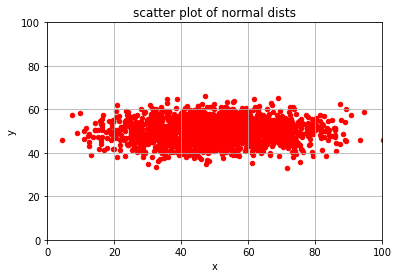

In [7]:
df_normal = gen_two_var_normal_dists_df()
fig = two_var_scatter_plt_on_figure(df_normal,
                                    title = "scatter plot " + \
                                             "of normal dists",
                                    color = 'r')

#### 8) [P] Generate a single figure that contains two axes that are adjacent to each other. You should have:<br/> <br/>&emsp;a. at least one shared axis<br/>&emsp;b. appropriate axis labels<br/>&emsp;c. make the range of the axis on both plots the same<br/>&emsp;d. display a legend on each to be sure both are labeled correctly as "normal" or "uniform"<br/>&emsp;e. One title at the top<br/><br/>&emsp;Here is one example:<br/><br/>&emsp;*output same as that in example*

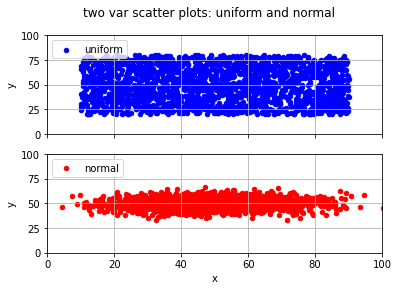

In [8]:
fig = two_var_scatter_plt_on_figure(df_uniform,
                                    fig=None, # explicit,
                                    plot_loc=(2,1,1), # explicit
                                    sharex_on=True,
                                    label='uniform',
                                    color='b') # explicit

fig = two_var_scatter_plt_on_figure(df_normal, 
                                    fig=fig,
                                    plot_loc=(2,1,2),
                                    sharex_on=True,
                                    label='normal',
                                    color='r')

# add figure title
fig.suptitle("two var scatter plots: uniform and normal")

# fig.axes[0] = uniform axes
# fig.axes[1] = normal axes

fig.axes[0].set_xlabel('')

# hide x axis on top figure
plt.setp(fig.axes[0].get_xticklabels(), visible=False);

#### 9) [P] Display both df_uniform and df_normal on one shared plot, with an appropriate legend

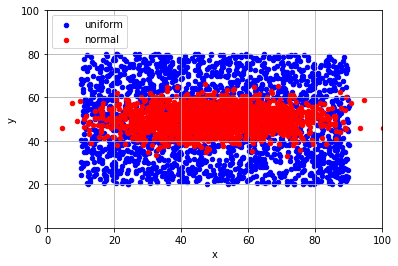

In [9]:
fig = two_var_scatter_plt_on_figure(
    df=df_uniform,
    fig=None,
    plot_loc=(1,1,1),
    label='uniform',
    color='b'
)

fig = two_var_scatter_plt_on_figure(
    df=df_normal,
    fig=fig,
    plot_loc=(1,1,1),
    label='normal',
    color='r'
);

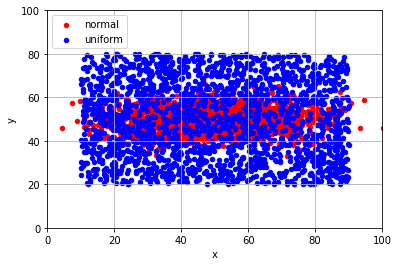

In [10]:
# uniform data overlayed on normal data

fig = two_var_scatter_plt_on_figure(
    df=df_normal,
    fig=None,
    plot_loc=(1,1,1),
    label='normal',
    color='r'
)

fig = two_var_scatter_plt_on_figure(
    df=df_uniform,
    fig=fig,
    plot_loc=(1,1,1),
    label='uniform',
    color='b'
);

### Using the pandas interface to matplotlib

#### 10) [M] What is a histogram? In your answer, in addition to defining it, please clearly indicate what type of data its good for, and whether it's good for one variable or to show relationships between multiple variables.

A frequency distribution takes a quantitative set of data and groups them into categories.<sup>1</sup> A (frequency) histogram visually portrays the amount of data points in a data set that fall within each category. It is good for when there is one numerical variable, of which the distribution is being visually summarized, and one categorical variable, which are represented by the histogram bins, (and preferably multiple observations per categorical group). <sup>2 3</sup> 

One could argue that a histogram displaying the distributions of multiple data sets across all of the categorical groups (stacking the histograms within one histogram), in which the data set that a distribution belongs to is a categorical variable.

Sources:
1. http://mathcenter.oxford.emory.edu/site/math117/frequencyDistributionsAndHistograms/
2. https://www.data-to-viz.com
3. Discussion with Prof. King on 4/7/2021

#### 11) [P] Using pandas, generate a histogram of both the x and y variables for df_uniform. Use 30 bins, and set the range of both variables to be 0 – 100. Repeat this exercise on df_normal. (HINT:Use the hist() method of DataFrame.)

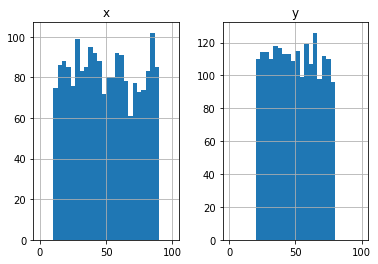

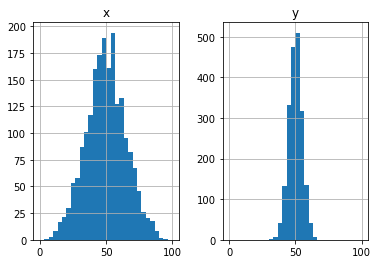

In [11]:
num_bins = 30
range_lower = 0
range_upper = 100

df_uniform.hist(bins=num_bins,
                range=(range_lower, range_upper))

df_normal.hist(bins=num_bins,
               range=(range_lower, range_upper));

#### 12) [M] What is a quantile?

A quantile is a subset of all of the observations (within a sample).<sup>1</sup> Quantiles of a set of observations are typically created such that each quantile has the same number of data points in it; 4-quantiles, for instance, would split the data into four parts, where each quantile holds one quarter of a series of elements within the larger observed set of elements.<sup>2</sup>

Sources:
1. https://www.sciencedirect.com/topics/mathematics/quantiles
2. 02/12/2021 "Statistics: Review of essential statistics," CSCI 349: Data Mining, Professor Brian R. King, Bucknell University

#### 13) [M] In terms of quantiles, what is a quartile? What about a percentile? What is an Inter-quartile range (IQR)?

Quartiles are 4-quantiles, which collectively group the observations within a data set into four groups containing four segments of the data.<sup>1</sup> Each quartile has one quarter of the data.<sup>1</sup> Similarly, percentiles are 100-quantiles, where each percentile stores one hundredth of the observations in the total data set.<sup>1</sup> The interquartile range is the difference between the value of the median of the upper half of the data set and that of the lower half of the data set; it measures the statistical spread, or dispersion more formally, of the middle fifty percent of the data set.<sup>1 2</sup>

Sources:
1. 02/12/2021 "Statistics: Review of essential statistics," CSCI 349: Data Mining, Professor Brian R. King, Bucknell University
2. https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/bs704_summarizingdata7.html

#### 14) [M, P] Read about the quantile() method for data frames, and use it to numerically show the 25th, median, and 75th percentiles, and compute the IQR (Inter-quartile range) for both variables, on both data frames. Compare and contrast.

In [12]:
def add_IQR(df_quantiles: pd.DataFrame):
    df_iqr = df_quantiles.loc[0.75] -\
                       df_quantiles.loc[0.25]
    df_iqr.name = 'IQR'

    return df_quantiles.append(df_iqr)
    

percentiles = [0.25, 0.5, 0.75]

print("Uniform data:")

df_uniform_quantiles = df_uniform.quantile(q=percentiles)

df_uniform_quantile_stats = add_IQR(df_uniform_quantiles)

display(df_uniform_quantile_stats)

print()
print("Normal data: ")

df_normal_quantiles = df_normal.quantile(q=percentiles)

df_normal_quantile_stats = add_IQR(df_normal_quantiles)

display(df_normal_quantile_stats)

Uniform data:


,x,y
0.25,29.629450,34.719075
0.5,48.825807,49.458214
0.75,69.762369,64.223903
IQR,40.132919,29.504828



Normal data: 


,x,y
0.25,40.046412,46.598897
0.5,49.700352,50.067534
0.75,60.000086,53.360589
IQR,19.953675,6.761691


For the uniform data, the IQR for x is about 39.78, or about half the range of 80 for the whole x data set, and the IQR for y is less, or about 31.10, which is also about half the range of 60 for the whole y data set. It makes sense that the middle fifty percent of the data for a uniformly distributed data set is about half the range for the whole data set. Logically, then, the IQR for the y data set is expected to be less than that for the x data set, that is, within the uniform data set.

For the normal data, the IQR for x is about 18.95, whereas the IQR for y is about 6.98. Considering the standard deivation of x is 15, or three times the standard deviation of y, which is 5, it makes sense that the IQR for x is about three times the IQR for y.

Overall, the IQRs for x and y of the normal data compared to those of the uniform data, respectively, are less; this can be explained by the fact that data points in a normal distribution are more concentrated around the mean, whereas those in a uniform distribution are uniformly spread out not only around the mean but all throughout the uniform data set.

#### 15) [M] There are many ways to define what we mean by an outlier. A very common technique is known as the IQR rule for outliers. What is a definition of an outlier in terms of IQR? (Big hint: Your answer should incorporate some use of 1.5 * IQR.)

An outlier, when defined in terms of IQR, is typically defined as any observation within a data set that is less than 1.5 * IQR, where IQR means the interquartile range, below the highest data point in the bottom quarter of the data set (first quartile), or more than 1.5 * IQR above the highest data point in the third highest quarter of the data set (third quartile).

Source: 
1. 02/12/2021 "Statistics: Review of essential statistics," CSCI 349: Data Mining, Professor Brian R. King, Bucknell University
2. https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule


#### 16) [P] Write a function called IQR_outlier_limits that takes a dataframe as input, and computes the minimum and maximum outlier thresholds for each variable (column) in the dataframe. The result that is returned will be stored in a data frame.

In [13]:
def IQR_outlier_limits(df: pd.DataFrame):
    df_quantiles = df.quantile(q=[0.25, 0.75])
    df_w_iqr = add_IQR(df_quantiles)
    
    df_min_max_thresholds = pd.DataFrame(columns=df.columns)
    df_min_max_thresholds.loc['minimum outlier threshold'] = \
    df_w_iqr.loc[0.25] - (1.5 * df_w_iqr.loc['IQR'])
    df_min_max_thresholds.loc['maximum outlier threshold'] = \
    df_w_iqr.loc[0.75] + (1.5 * df_w_iqr.loc['IQR'])
    
    return df_min_max_thresholds

#### 17) [P] Show the result of your IQR_outlier_limits function on df_uniform and df_normal. For example, your result on df_normal should look something like the following:<br/><br/>&emsp;&emsp;*output matches example in assignment*<br/><br/>(NOTE: The results will depend on the actual distribution of your random data.)

In [14]:
print('min max outlier thresholds:')
print()
print()
print('df_uniform')
display(IQR_outlier_limits(df_uniform))
print()
print('df_normal')
display(IQR_outlier_limits(df_normal))

min max outlier thresholds:


df_uniform


,x,y
minimum outlier threshold,-30.569929,-9.538168
maximum outlier threshold,129.961748,108.481146



df_normal


,x,y
minimum outlier threshold,10.115900,36.456360
maximum outlier threshold,89.930598,63.503126


#### 18) [P] Use your function you defined above to print a subset of each dataframe that contains the outliers for df_normal and df_uniform. (HINT: You should get at many outliers for df_normal. However, your uniform data should not have outliers.). Print the number of outliers found for each dataset.

In [15]:
def get_col_outliers(col: pd.Series,
                     df_IQR_outlier_bounds: pd.DataFrame,
                     min_idx_label = 'minimum outlier threshold',
                     max_idx_label = 'maximum outlier threshold'):

    col_outliers = \
    col[ 
        (col < df_IQR_outlier_bounds.loc[min_idx_label, 
                                         col.name])
        | 
        (col > df_IQR_outlier_bounds.loc[max_idx_label,
                                         col.name]) 
    ] 
    
    return col_outliers

def get_outliers(df: pd.DataFrame,
                 min_idx_label = 'minimum outlier threshold',
                 max_idx_label = 'maximum outlier threshold'):
    
    df_IQR_outlier_bounds = IQR_outlier_limits(df)
    
    df_outliers = df.apply(
        get_col_outliers,
        df_IQR_outlier_bounds = df_IQR_outlier_bounds,
        axis=0
    )
                                
    return df_outliers

def _print_col_name(col_name: str):
    print("\tcolumn " + str(col_name) + ":")

def _display_outliers_col_wo_nan(col_outliers: pd.Series):
    _print_col_name(col_outliers.name)
    if (col_outliers.dropna().size != 0):
        display(col_outliers.dropna())
    else:
        print("No outliers.")
    

def display_outliers_by_col(df: pd.DataFrame):
    df_outliers = get_outliers(df)
    if df_outliers.size != 0:
        df_outliers.apply(
            _display_outliers_col_wo_nan,
            axis=0)
    else:
        for col_name in df_outliers.columns:
            _print_col_name(col_name)
            print("No outliers.")
    
def display_outliers(dfs: dict):
    print("Outliers\n\n")
    for name, df in dfs.items():
        if type(df) is pd.DataFrame:
            print(name + ":")
            display_outliers_by_col(df)
            print()
    
display_outliers({"df_uniform": df_uniform, 
                  "df_normal": df_normal})

Outliers


df_uniform:
	column x:
No outliers.
	column y:
No outliers.

df_normal:
	column x:


189      90.825983
563      93.315688
856     102.281903
1142     94.656219
1192      4.265949
1338      9.637927
1459      7.448482
1559      8.941621
1994    100.116749
Name: x, dtype: float64

	column y:


67      35.351687
220     34.894127
645     64.721401
672     64.602477
942     33.600592
1029    36.260820
1037    65.309479
1115    63.806932
1298    35.586993
1601    66.248557
1715    33.015388
1820    36.281012
1830    64.830897
1930    34.913810
Name: y, dtype: float64

#### 19) [M] What is a box plot? (A.k.a boxplot, box-and-whisker plot). In your answer, please clearly indicate what it is, what type of data its good for, and whether it's good for one variable or to show relationships between multiple variables.

A box-and-whisker plot visually shows "the five-number summary," which includes "the minimum, first quartile, median, third quartile, and maximum", of a dataset.<sup>1</sup> Each box-and-whisker describes a particular distribution. The edges of the box (touching the whiskers) are the first quartile and third quartile; the middle line through the box represents the median. Each whisker represents either the minimum or the maximum of the distribution being described. A box plot is good for a) "one or several numeric variables" that are not ordered, b) one or more numerical variable(s) and one categorical variable, and c) several categorical variables with one numerical variable.<sup>2</sup> Here are examples of each:<br/>
&emsp;a) distribution(s) of student ages in a (various) town(s) in groups of 10, i.e. 10-19, 20-29, etc.<br/>
&emsp;b) distribution(s) of student ages in a (various) town(s) in groups of 10 that liked cheese compared with those of them that did not like cheese<br/>
&emsp;c) distribution(s) of student ages in a (various) town(s) in groups of 10 that liked cheese compared with those of them that did not like cheese, with another set of categories in the categories of liking cheese and not liking cheese that includes those that like crackers and those that do not like crackers

It's good to show the relationship between multiple variables (numeric variable(s) and/or categorical variable(s)).



Source:
1. https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
2. https://www.data-to-viz.com

#### 20) [P] Again, use the pandas DataFrame plotting interface to generate a box plot on both x and y variables of both df_uniform and df_normal.

In [16]:
def _print_boxplot_whiskers_endpoints(whiskers: list):
    for i in range(len(whiskers)):
        if i % 2 == 0: # lower whisker
            print("boxplot #" + \
                  str(1+int(i/2)))
            print("min: " + \
                  str(whiskers[i].get_ydata()[1]))
        else: # upper whisker
            print("max: " + \
                  str(whiskers[i].get_ydata()[1]))

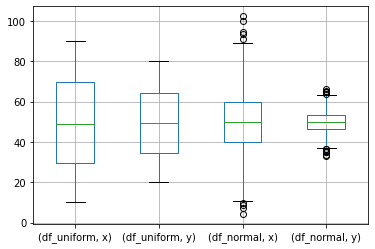

In [17]:
df = pd.concat(
    [df_uniform, df_normal], 
    axis=1,
    keys=("df_uniform", "df_normal")
)

df.boxplot();

In [18]:
df.describe()

df_uniform                 df_normal             
                 x            y            x            y
count  2000.000000  2000.000000  2000.000000  2000.000000
mean     49.665572    49.575352    49.887033    49.977348
std      23.162759    17.179800    15.066202     5.040160
min      10.000400    20.004133     4.265949    33.015388
25%      29.629450    34.719075    40.046412    46.598897
50%      48.825807    49.458214    49.700352    50.067534
75%      69.762369    64.223903    60.000086    53.360589
max      89.996157    79.992351   102.281903    66.248557

boxplot #1
min: 10.000399962841744
max: 89.99615670423567
boxplot #2
min: 20.004132763397934
max: 79.9923512315631
boxplot #3
min: 10.807801256085575
max: 89.27621453459926
boxplot #4
min: 36.90026151383461
max: 63.24159666412574


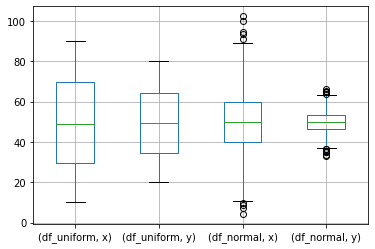

In [19]:
# left to right
# boxplot #1 is (df_uniform, x)
# ...
# boxplot #4 is (df_normal, y)
_print_boxplot_whiskers_endpoints(
    df.boxplot(return_type="dict")['whiskers']
)

#### 21) [M] From your understanding of a box plot, summarize the distribution of these data, comparing the uniform and the normal distributed data. You should be using the correct terminology, meaning, interpreting the box plot results in terms of quartiles, outliers, etc.

*Note: Data points will be, at most, approximated to two decimal places for the sake of simplicity.*

The x data set within df_uniform has a minimum of about 10 (10.01), Q1 (first quartile) of about 30 (29.32), median of about 50 (50.21), Q3 (third quartile) of about 70 (71.40), and maximum of about 90 (89.8). As this data set was sampled from a uniformly distributed data ranging from 10 to 90, it makes sense that the minimum and maximum are about 10 and 90, respectively. Also, because the data is from an underlying uniform distribution, it makes sense that the data point which is greater than the lower quarter of the data points is located about a quarter of the way from 10 to 90, or 30. The same applies, due to the uniform nature of the underlying distribution that is being sampled from, to the median and Q3 of about 50 and 70, respectively, which are 50 and 75 percent of the way from 10 to 90, respectively.

The y data set within df_uniform has a minimum of about 20 (20.16), Q1 (first quartile) of about 35 (33.95), median of about 50 (49.07), Q3 (third quartile) of about 65 (65.26), and maximum of about 80 (79.99). Analogous analysis as was done above for the x data set within df_uniform is to be applied for the y data set within df_uniform, in which case the data set was sampled from a uniformly data set ranging from 20 to 80.

Because the underlying distributions of x and y within df_uniform had specified ranges and uniform characteristic of the distributions, the minimum and maximum points were about 0.5\*IQR less than Q1 and greater than Q3, respectively, which is well within the IQR outlier thresholds of 1.5\*IQR more than Q1 and greater than Q3, respectively.

The x and y data sets within df_normal have a minimum (excluding outliers) of about 9.12 and about 36.55, respectively. They have a Q1 of about 39.50 and about 46.81, respectively. They have a median of about 49.64 and about 49.89, respectively, which are comparable to one another. It is notable that the minimum and Q1 of the y df_normal distribution are closer to the median than the minimum and Q1 of the x df_normal distribution; this can be attributed to the fact that the spread of the y distribution is factors less than that of x (standard deviation of y, df_normal is one third of that of x, df_normal). The 'closer tendency' (less spread) towards the median of the data set y compared to x can also be observed in examining Q3 and maximum of both data sets, above the median. Q3 of x, df_normal is about 60.29 compared to that of y, df_normal at around 53.77, the latter of which is closer to the similar medians of about 50 shared by the two data sets. Furthermore, the maximum of x, df_normal is about 104.36 and that of y, df_normal is about 69.22, which is another example of the 'spreads from the median' between the two data sets x, df_normal and y, df_normal, where the latter has less spread than the former due to the underlying distribution of the latter sample having a standard deviation, a measure of spread, of about one third of that of the former sample.

In terms of comparing df_uniform with df_normal, there appear to be two primary points to note. The first is that the spreads of the data sets in df_uniform are larger than those in df_normal, as the data sets in df_normal have underlying distributions that are normal, which means that the values within the distribution (that the samples, in turn, will be reflective of) have a tendency towards the median (less 'spread out' and more 'concentrated towards the median'). The second observation is that samples from a uniform underlying distribution are contained within the min and max defined for the distribution; on the other hand, samples from a normal underlying distirbution have a probability of generating data points far far from the median, creating outliers (which is not the same for samples coming from a uniform underlying distribution).


#### 22) [M] What is a density plot? In your answer, please clearly indicate what it is, the type of data you use it for, and whether it's good for one variable or to show relationships between multiple variables.

A density plot visually demonstrates "the distribution of [(one or more)] numeric [variable(s)]," in that one can extrapolate the probability that a particular numeric variable takes on a range of values by taking the integral of the continuous probability distribution plotted, which is sometimes estimated with kernel density estimation, for that value between the endpoint values of the range.<sup>1</sup> A density plot can demonstrate the relationship among the probability distribution of values of multiple numeric variables. Some data scientists recommend that no more than three numeric distributions should be visualized on a density plot a time to avoid crowding and maintain the comparative, visual clarity of the plot.<sup>1</sup>

Sources:
1. https://www.data-to-viz.com/graph/density.html

#### 23) [P] Use the pandas interface to generate a density plot for both x and y variables of both df_uniform and df_normal.

<AxesSubplot:ylabel='Density'>

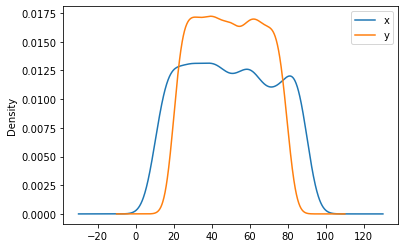

In [20]:
df_uniform.plot.density()

<AxesSubplot:ylabel='Density'>

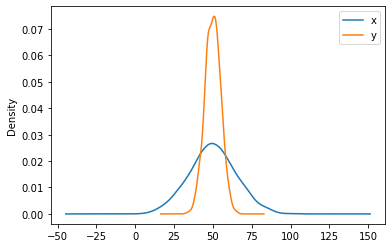

In [21]:
df_normal.plot.density()

#### 24) [M] Interpret the density plot results

Within the **df_uniform** plot, one can see that the rate of the increasing of the continuous probability distribution of x and y (from left to right) takes place until around 10 and around 20, respectively, after which the respective distributions appear to have a slower rate of increase (left to right) in the local region. A similar phenomenon happens on the other side of the 'hump' of each sample's continuous probability distribution at about 80 and about 90 for x and y in df_uniform, where the rates of decrease appear to increase, respectively. Because these probability distribution curves are estimated, in this case using kernel density estimation, even though there is a positive probability density for values beyond the aforementioned extrema, these should be interpretted in the context of the estimation function trying to 'smooth' the 'sharp' increase in probability density at those extrema points (e.g. for x, df_uniform distribution, true probability density of values below 10 or above 90 are exactly 0 - the error of the probability density function, which is estimated, is explicitly evident here). <sup>1</sup> The median remains at 50 for either distribution. The area under the curve for each distribution is 1. Because each distribution is uniform, the probability density should be uniform across each; this is demonstrated by the graph (one could argue that a larger sample size could make the probability density appear more constant). For x, the probability density is approximately 0.125, and the range of the sample distribution is about 80; a rectangular area approximation of the area under the curve is about 1. The same applies for y, where the probability density is approximately at 0.165 and range is about 60. (Of course, we can also assume that there is no skew in either distribution, as evident in the graph; these are *uniform* distributions.)

Within the **df_normal** plot, one can see the classic 'bell curve' seen in distributions that resemble a Gaussian normal distribution, which is what the true underlying distributions have been generated from. There is no skew for either curve, as they were drawn from a normal distribution. Their means are both 50, as expected and defined as one of the parameters of the normal distributions that generated both data sets, respectively. The probability that observations sampled from the distribution the y data points were drawn from are close to the mean is greater than those from that the x data points were. The lesser spread of the y distribution as compared to that of x is evident, once again, i.e. the 'tendency towards the middle.' Visually, more of the area under the x curve is concentrated at the average of curve than that under the y curve. (The probability density value at around 50 is 0.08 for the y distribution, which is about four times that at around 50 being 0.02 for the x distribution.)

Sources:
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.density.html

#### 25) [M] What is a quantile-quantile plot (Q-Q plot)? (HINT: Wikipedia provides a good answer for this one.)

A quantile-quantile plot is a scatterplot, where each data point has an x value of a value in one distribution at a particular quantile level within that distribution and a corresponding y value that is a value in the other distribution at that same quantile level within that distribution, with a reference line; if there is no value within a distribution at a particular quantile level, one will be interpolated from the existing values within that distribution (typically, if not always, when the two distributions are not the same size).<sup>1 2 3</sup> (Broadly speaking, interpolation, in statistics, means that numeric values within a sequence of numeric values are estimated when the values being estimated are within the range of the sequence.<sup>4</sup>) 

A QQ-plot suggests whether the two sample distributions come from the same population, as well as shows other statistical relationships between two numeric distrbutions.<sup>2</sup> A sample distribution can also be compared to a theoretical distribution, such as a normal distribution, to see how closely/if the sample distribution resembles the 'statistical shape' of the theoretical distribution. Some of the important statistical relationships derived from a Q-Q plot are "distributional aspects," such as whether values from one distribution are higher than those from the other distribution or even visually inspecting how closely similar the two distributions are (how much do the data points, which have coordinate values from each distribution corresponding to particular quantile levels, fall at the reference line, which essentially means that the values at particular quantile level(s) are equivalent in both distributions).

Sources:
1. https://data.library.virginia.edu/understanding-q-q-plots/
2. https://www.itl.nist.gov/div898/handbook/eda/section3/eda33o.htm
3. https://en.wikipedia.org/wiki/Q–Q_plot
4. https://www.investopedia.com/terms/i/interpolation.asp

#### 26) [P] Load the scipy.stats package as stats. Look up the API and read about the probplot function.<br/>(See http://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics. gofplots.qqplot ) This can generate a Q-Q plot for you quite easily. Generate a Q-Q plot for a sample of 100 points from the x-variable df_uniform. Do the same for df_normal. For illustrative purposes, assume your distribution is normal for both plots (even though we know it is not!)

In [22]:
import scipy.stats as stats

Q-Q Plot for uniform distribution (against normal distribution)


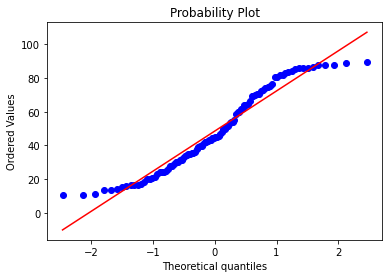

In [23]:
print("Q-Q Plot for uniform distribution (against normal distribution)")
# sampling 100 points from df_uniform and using their x coordinates
# against normal distribution (dist='norm')
p = stats.probplot(df_uniform.sample(100).x, dist='norm', plot=plt)

Q-Q Plot for normal distribution (against normal distribution)


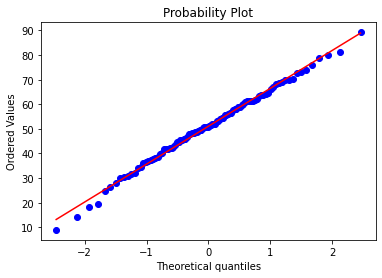

In [24]:
print("Q-Q Plot for normal distribution (against normal distribution)")
p = stats.probplot(df_normal.sample(100).x, dist='norm', plot=plt)

#### 27) [M] Compare and contrast your resulting plot. Does the output suggest that one is indeed normally distributed, and the other is not?

The normal probability plot (a specialized version of the Q-Q plot) of the uniform distribution demonstrates a more pronounced departure from normality than that of the normal plot, as expected, as the former deviates more significantly, as can be observed visually, from the reference line than the latter. The plot of the uniform distribution and that of the normal distribution both have many data points on or relatively around the reference line.

After observing **multiple** trials of the plot of the normal distribution and ignoring outliers, the data points fit along the reference line (with slight departures from the line being plausibly attributed to the variability of samples from the underlying distribution); this implies that the theoretical distribution, which is a normal distribution, models the other distribution, which is also a normal distribution, very well. On the other hand, after doing the same, i.e. multiple trials and ignoring outliers, the plot of the uniform distribution demonstrates clear and statistically understandable departures from the normal model, according to the normal probability plot above. The lowest quantiles in the uniform distribution are higher than that of the normal distribution (above the line) because the values of the latter start at extremely low point(s) at the tails whereas those of the former have a contained, set minimum that they start at. In the lower-mid quantiles, one can see a departure of the curve from the trend line below the line, where many quantiles (until the 50th percentile) in the normal distribution are surrounding the median, i.e. higher, whereas the ones in the uniform distribution are spread out between lower points until the median. Then, in the mid-upper quantiles, one can see a departure of the curve from the reference line above the line, where many quantiles (beyond the 50th percentile) in the normal distribution remain surrounding the median, i.e. lower, whereas the ones in the uniform distribution spread out between the median and higher points. Finally, in the upper quantiles, the quantiles in the normal distribution extend further out, i.e. higher (when normal is higher, below the line), than those of the uniform distribution, where there is a fixed maximum after which there are no more values (unlike the theoretically infinite range towards infinity of the normal distribution).

Hence, the output does suggest that one is normally distributed, i.e. the normal distribution, and the other is not, i.e. the uniform distribution, which makes logical sense.

Sources:
1. https://www.youtube.com/watch?v=X9_ISJ0YpGw
2. https://en.wikipedia.org/wiki/Normal_probability_plot

#### 28) [P] Repeat the experiment, showing a Q-Q plot for 100 samples of each dataset. However, now assume the distribution is uniform.

Q-Q Plot for uniform distribution (against uniform distribution)


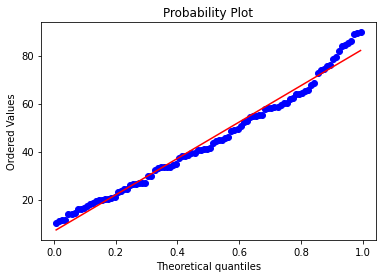

In [25]:
print("Q-Q Plot for uniform distribution (against uniform distribution)")
# sampling 100 points from df_uniform and using their x coordinates
# against normal distribution (dist='norm')
p = stats.probplot(df_uniform.sample(100).x, dist='uniform', plot=plt)

Q-Q Plot for normal distribution (against uniform distribution)


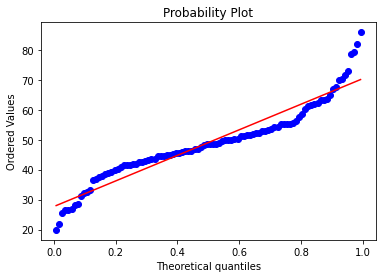

In [26]:
print("Q-Q Plot for normal distribution (against uniform distribution)")
p = stats.probplot(df_normal.sample(100).x, dist='uniform', plot=plt)

#### 29) Again, compare the plots. Does the output suggest one is indeed normally distributed and the other is not?

*TL;DR The explanation is somewhat the reverse of 27), hence the TL;DR for 29) here. The output confirms that the uniform distribution is represented well by a uniform distribution rather than a normal distribution (due to the presentation of the points on the reference line for its plot against the uniform distribution). The departure from the reference line of the normal distribution when plotted against the uniform distribution demonstrates that it is not well-fitted by a uniform distribution, and the shape of the curvature along the reference line demonstrates similarity in properties to, in general, the Q-Q plot of a normal distribution against a uniform plot.*

The Q-Q plot against a uniform distribution of the normal distribution demonstrates a more pronounced departure from uniformity than that of the uniform plot, as expected, as the former deviates more significantly, as can be observed visually, from the reference line than the latter. The plot of the uniform distribution and that of the normal distribution both have many data points on or relatively around the reference line.

After observing **multiple** trials of the plot of the uniform distribution and ignoring outliers, the data points fit along the reference line (with slight departures from the line being plausibly attributed to the variability of samples from the underlying distribution); this implies that the theoretical distribution, which is a uniform distribution, models the other distribution, which is also a uniform distribution, very well (implying that it is not normally distributed). On the other hand, after doing the same, i.e. multiple trials and ignoring outliers, the plot of the normal distribution demonstrates clear and statistically understandable departures from the uniform model, according to the Q-Q plot above. The lowest quantiles in the uniform distribution are higher than that of the normal distribution (below the line) because the values of the latter start at extremely low point(s) at the tails whereas those of the former have a contained, set minimum that they start at. In the lower-mid quantiles, one can see a departure of the curve from the trend line above the line, where many quantiles (until the 50th percentile) in the normal distribution are surrounding the median, i.e. higher, whereas the ones in the uniform distribution are spread out between lower points until the median. Then, in the mid-upper quantiles, one can see a departure of the curve from the reference line below the line, where many quantiles (beyond the 50th percentile) in the normal distribution remain around the median, i.e. lower, whereas the ones in the uniform distribution spread out between the median and higher points. Finally, in the upper quantiles, the quantiles in the normal distribution extend further out, i.e. higher (when normal is higher, above the line), than those of the uniform distribution, where there is a fixed maximum after which there are no more values (unlike the theoretically infinite range towards infinity of the normal distribution).

Hence, the output does suggest that one is normally distributed, i.e. the normal distribution, and the other is not, i.e. the uniform distribution, which makes logical sense.

Sources:
1. https://www.youtube.com/watch?v=X9_ISJ0YpGw
2. https://en.wikipedia.org/wiki/Normal_probability_plot

### Part 2 - seaborn

#### 30) [P] Generally, seaborn works best when all of your data to be plotted is in one dataframe. So, create a new dataframe that contains both df_uniform and df_normal, with a new categorical variable (hint = set it to pd.Categorical!) called "type", with levels "uniform" and "normal" respectively. Show the output of value_counts() on the "type" variable. It should look like:

#### &emsp;&emsp;*output in assignment is same as output below*

In [27]:
df_comb = pd.concat(
    [df_uniform.assign(type='uniform'), 
     df_normal.assign(type='normal')]
)

df_comb['type'] = pd.Categorical(df_comb['type'])

df_comb['type'].value_counts()

normal     2000
uniform    2000
Name: type, dtype: int64

#### 31) [P] Show a scatterplot of both df_uniform and df_normal side by side on the same figure (HINT: FacetGrid will make this quite easy):

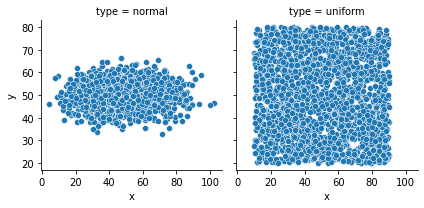

In [28]:
fg = sns.FacetGrid(df_comb, col = "type")
fg.map(sns.scatterplot, "x", "y")
fg

#### 32) [P] Show the distribution of only the x variable for both df_uniform and df_normal, with a density curve. (HINT: Use histplot.)

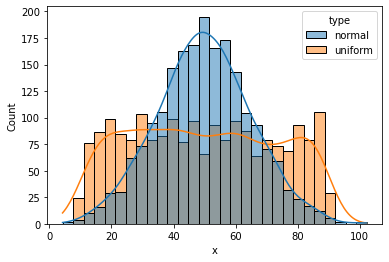

In [29]:
hp = sns.histplot(data=df_comb, 
                  x="x", 
                  hue="type",
                  kde=True)

#### 33) [M] What is a jointplot in Seaborn?

A jointplot in Seaborn is a plot displaying data of two variables containing a graph with both the two variables (both axes) and with one variable (two graphs, each showing the distribution of one of the variables along its respective axes).<sup>1 2</sup>  It allows for simultaneously analyzing the relationship, including factors like its strength, between both variables, as well as examining the nature, including its shape and its spread, of each distribution.

Sources:
1. http://seaborn.pydata.org/generated/seaborn.jointplot.html
2. https://ajaytech.co/2020/09/28/8780/

#### 34) [P] Use sns.jointplot to show the bivariate distribution of x and y for df_uniform and df_normal

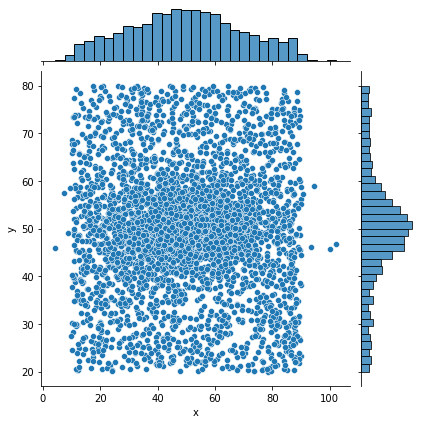

In [30]:
jp = sns.jointplot(x="x", y="y", data=df_comb)
jp

#### 35) [P] Show a hexbin plot using sns.jointplot for df_normal

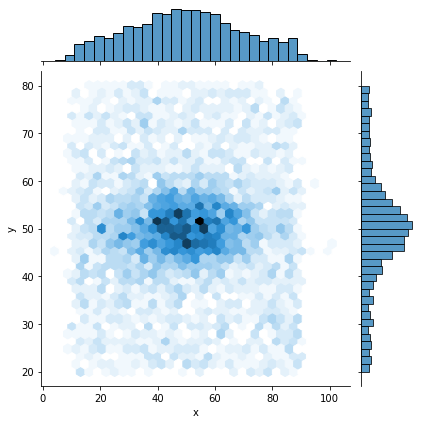

In [31]:
jp_hex = sns.jointplot(x="x", y="y", data=df_comb, kind="hex")
jp_hex

#### 36) [P] Let's checkout a popular, but simple public dataset on tooth growth in Guinea Pigs. Here is a simple description of the data:<br/><br/>https://vincentarelbundock.github.io/Rdatasets/doc/datasets/ToothGrowth.html<br/><br/>Now, open up the csv file located at the following URL and just look at the format:<br/><br/>https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv<br/><br/>You should see that the first column is your index. It has a header row. There are two numeric variables (len, dose), and one nominal ("supp").<br/><br/>OK, go ahead and read the data. You should embed the URL right in a pd.read_csv() call:<br/><br/>```df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv",index_col=0)```

In [102]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv",index_col=0)

#### 37) [P] Look at the info() and describe() output. You will see that len and dose are in the correct format. However, you need to change the supp variable into a true Categorical type. Look up pd.Categorical and change df.supp into an unordered categorical (i.e. nominal) variable. Confirm that you did this by showing the output of df.info()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [104]:
df.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [125]:
df.supp = pd.Categorical(df.supp)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   len     60 non-null     float64 
 1   supp    60 non-null     category
 2   dose    60 non-null     float64 
dtypes: category(1), float64(2)
memory usage: 3.6 KB


#### Now, explore the distribution of the data. You have one dependent variable, length, (i.e. your response variable) which is numeric. The other two other are independent variables (i.e. your explanatory variables). You know supp is a categorical, so perhaps that can be used to color code data. Our aim is to explore the distributions, and also identify potential relationships and dependencies between the explanatory variables and the response. Can you visually confirm whether there is some type of relationship between dose and length?

<AxesSubplot:xlabel='dose', ylabel='len'>

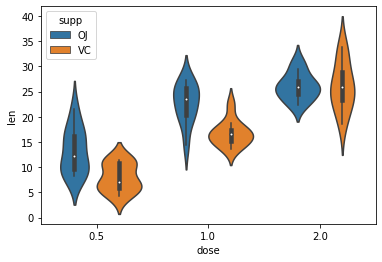

In [126]:
sns.violinplot(data=df, x="dose", y="len", hue="supp")

I can visually identify that there is a positive relationship between dose of Vitamin C given and tooth length.

#### 38) [P] Generate a scatterplot (remember, all plots in this section should be with Seaborn) showing the dose as x, and the length as y. Set the hue as the supp variable. Be sure to title and label your graphs.

In [127]:
def _label_axes_ax(ax: mpl.axes.Axes,
                   title: str,
                   x_label: str,
                   y_label: str):
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

In [128]:
def _convert_legend_labels_ax(ax: mpl.axes.Axes, 
                              label_convert_dict: dict,
                              legend_title: list):
    handles, labels = ax.get_legend_handles_labels()
    for i in range(len(labels)):
        if labels[i] in label_convert_dict.keys():
            labels[i] = label_convert_dict[labels[i]]
    ax.legend(labels=labels, handles=handles, title=legend_title)

In [129]:
# data parameters
x_col_name = "dose"
y_col_name = "len"
hue_col_name = "supp"
# visual parameters
x_label = "Dose (mg/day)"
y_label = "Tooth Length"
hue_label = "Supplement Type"
title = "Distributions of Tooth Length w/" + \
        "Varying Doses and Supplement Type"
label_convert_dict = {"OJ": "Orange Juice", 
                      "VC": "Ascorbic Acid"}

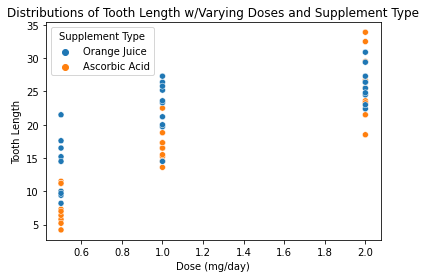

In [130]:
curr_ax = sns.scatterplot(data=df, 
                          x=x_col_name, 
                          y=y_col_name, 
                          hue=hue_col_name)

_label_axes_ax(ax=curr_ax,
               title=title,
               x_label=x_label,
               y_label=y_label)

_convert_legend_labels_ax(ax=curr_ax, 
                          legend_title=hue_label,
                          label_convert_dict=label_convert_dict)

#### 39) [PM] You should see that there is an obvious correlation between dose and length. However, you should also see that the dose is a controlled dose, with only three possible values given. Thus, in theory, it's a type of nominal variable, but we will leave it as numeric. A scatterplot is not a great choice. So, a scatterplot is not really a good choice. Let's do better.<br/><br/> Start by looking up catplot in Seaborn. This is a high level interface to a variety of categorical plots. Use it to create a stripplot.

To summarize, the goal of **catplot** is to visually (through one of several types of plots) demonstrate the statistical relationship "between a numerical and one or more categorical variables."<sup>1</sup> There are three main categories of categorical plots offered through this "Figure-level interface," where each category offers specific types of plot capabilities through respective seaborn interfaces: "categorical scatterplots," "categorical distribution plots," and "categorical estimate plots."<sup>1</sup> A categorical scatterplot entails a series of scatterplots across multiple nominal values of a categorical variable. A categorical distribution plot shows varying levels of detail about the overall distribution of the numerical variables within each category (in turn, within a categorical variable) but less detail than a scatterplot, which plots each data point within the plot itself. The categorical estimation plots, broadly speaking, give a sense of the central tendency of each numerical distribution across multiple categories with relevant confidence intervals/error bars.<sup>2 3 4</sup>



Sources:
1. https://seaborn.pydata.org/generated/seaborn.catplot.html
2. https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot
3. https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
4. https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot

In [131]:
def _label_axes_fg_one_plt(fg: sns.FacetGrid,
                           title: str,
                           x_label: str,
                           y_label: str,
                           vertical_shrink_factor: float = 0.9):
    fg.fig.subplots_adjust(top=vertical_shrink_factor)
    fg.fig.suptitle(title)
    fg.set_xlabels(x_label)
    fg.set_ylabels(y_label)    

In [46]:
def _convert_legend_labels_fg_one_plt(fg: sns.FacetGrid,
                                      legend_title: str,
                                      label_convert_dict: dict,
                                      bbox: tuple=None):
    fg.legend.get_title().set_text(legend_title)
    
    for text_objects in fg.legend.get_texts():
        text_objects.set_text(
            label_convert_dict[text_objects.get_text()]
        )
        
    if bbox is not None:
        fg.legend.set_bbox_to_anchor(bbox=bbox)

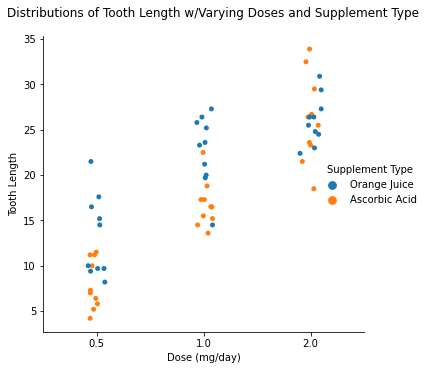

In [133]:
# data parameters
x_col_name = "dose"
y_col_name = "len"
hue_col_name = "supp"

curr_fg = sns.catplot(kind="strip", 
                      data=df, 
                      x=x_col_name, 
                      y=y_col_name, 
                      hue=hue_col_name)

_label_axes_fg_one_plt(fg=curr_fg,
                       title=title,
                       x_label=x_label,
                       y_label=y_label)

_convert_legend_labels_fg_one_plt(
    fg=curr_fg, 
    legend_title=hue_label,
    label_convert_dict=label_convert_dict)



A **stripplot** is a series of scatterplots distinguished by their category; it is an example of a categorical scatterplot, one of the types of categorical plots plotted by the seaborn.catplot method.<sup>1</sup>

Sources:
1. https://seaborn.pydata.org/generated/seaborn.stripplot.html

#### 40) That's a bit better, but we can do far better. Create a histogram for tooth length with the hue set to the supplement. Overlap the density graph. Then, in a followup markdown cell, comment on the effect that the supplement alone might have on tooth length. Which do you think results in longer tooth length?

#### An example output is shown below<br/><br/>*output below matches the output in the assignment*

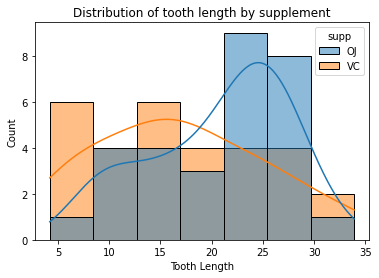

In [134]:
# data parameters
x_col_name = "len"
hue_col_name = "supp"
# visual parameters
x_label = "Tooth Length"
y_label = "Count"
hue_label = "Supplement Type"
title = "Distribution of tooth length by supplement"


curr_ax = sns.histplot(data=data_df, 
                  x=x_col_name, 
                  hue=hue_col_name, 
                  kde=True)

_label_axes_ax(ax=curr_ax,
               title=title,
               x_label=x_label,
               y_label=y_label)

*Note: peak refers to the peak of the KDE curve of the distributions (the 'estimated mode'). as such, the word mode will not be used, as that implies discussion about the true mode for the specific sample distributions of this experiment rather than their generalized estimations (provided by the KDE curve)*

Giving the guinea pigs Vitamin C via orange juice yielded a peak (on the kernel density estimation curve of the corresponding histogram) of a tooth length of roughly 25 versus giving it to them via ascorbic acid (abbreviated as VC) yielded a peak of a tooth length of rougly 15 (error margin of part of a bin), according KDE curve.<sup>1</sup> However, the graph of the former appears to be skewed left (suggesting that its median is lower than the peak), whereas the graph of the latter appears to be skewed right (suggesting that its median is higher than the peak), according to the KDE.<sup>2</sup> Due to the dynamic of the peaks and skewness, the difference in the peaks is plausibly less than the difference in the medians (and more so the difference in the means).<sup>2</sup> (As a side note, I realize that it is possible to estimate central tendency through using formulas related to binning and interpolation as demonstrated in one of your slides; however, this seems to be more than what the question is asking.) It may be visually observed that Orange Juice as the supplement type for administering Vitamin C is correlated with greater tooth length overall than the counterpart supplement type of ascorbic acid. *At the same time, this statement should be taken with a grain of salt due to a) the relatively small sample sizes of the two distributions (count across histogram bins visually appears quite variable compared to the outline created by the kernel density estimation curve) and b) the affect of skewness on the placement of the peaks of the two distributions relative that of their medians (their KDE medians are closer together than their KDE peaks).*

Sources:
1. https://vincentarelbundock.github.io/Rdatasets/doc/datasets/ToothGrowth.html
2. https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/#SkewLeft

#### 41) [PM] Create a boxplot showing the distribution of length by dose, and also set the hue again to be supp. Comment on your findings.

In [ ]:
# data parameters
x_col_name = "dose"
y_col_name = "len"
hue_col_name = "supp"
# visual parameters
x_label = "Dose (mg/day)"
y_label = "Tooth Length"
hue_label = "Supplement Type"
title = "Distributions of Tooth Length w/" + \
        "Varying Doses and Supplement Type"
label_convert_dict = {"OJ": "Orange Juice", 
                      "VC": "Ascorbic Acid"}

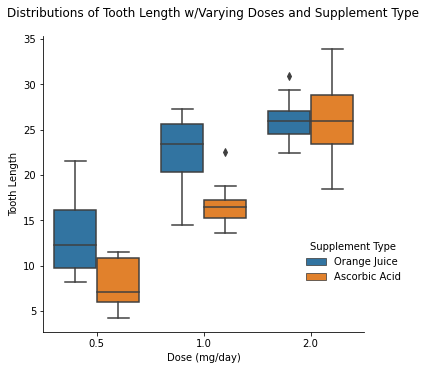

In [48]:
fg = sns.catplot(kind="box",
                 data=df,
                 x=x_col_name,
                 y=y_col_name,
                 hue=hue_col_name)

_label_axes_fg_one_plt(fg=fg, 
                       title=title, 
                       x_label=x_label, 
                       y_label=y_label)

_convert_legend_labels_fg_one_plt(
    fg=fg,                          
    label_convert_dict=label_convert_dict,                      
    legend_title=hue_label,                     
    bbox=(1, 0.3, 0, 0))

As the dose of Vitamin C was increased, the overall observed tooth length was positively correlated. Giving the guinea pigs Vitamin C through orange juice, abbreviated as OJ, correlated with greater tooth length than doing so through ascorbic acid, abbreviated as VC, except in the 2.0 mg/day dose case. There was not a significant difference in spread across the dosage or supplement types (spread outliers: 1.0 mg/day and ascorbic acid, as well as 2.0 mg/day and orange juice). This matches what was observed in the histogram/KDE plot above. 

#### 42. [PM] A violinplot is a popular visualization that can convey a lot of information about the distribution of your variables onto one plot. Some prefer these over boxplots. Read about violinplots in the Seaborn API, then use it to plot redo the previous boxplot, but set split=True. Then redo it with split=False. Comment on your findings.

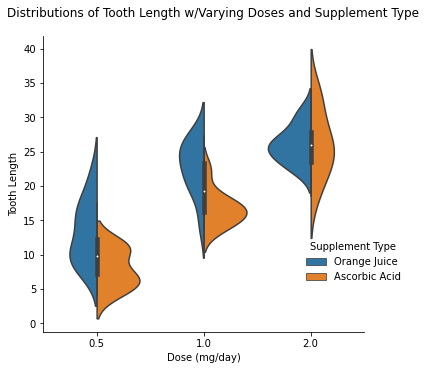

In [50]:
fg = sns.catplot(kind="violin",
                 data=df,
                 x=x_col_name,
                 y=y_col_name,
                 hue=hue_col_name,
                 split=True)

_label_axes_fg_one_plt(fg=fg, 
                       title=title, 
                       x_label=x_label, 
                       y_label=y_label)

_convert_legend_labels_fg_one_plt(
    fg=fg,                          
    label_convert_dict=label_convert_dict,                      
    legend_title=hue_label,                     
    bbox=(1, 0.3, 0, 0))

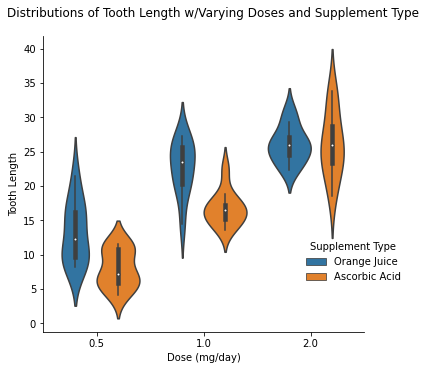

In [52]:
fg = sns.catplot(kind="violin",
                 data=df,
                 x=x_col_name,
                 y=y_col_name,
                 hue=hue_col_name,
                 split=False)

_label_axes_fg_one_plt(fg=fg, 
                       title=title, 
                       x_label=x_label, 
                       y_label=y_label)

_convert_legend_labels_fg_one_plt(
    fg=fg,                          
    label_convert_dict=label_convert_dict,                      
    legend_title=hue_label,                     
    bbox=(1, 0.3, 0, 0))

A violinplot allows for displaying information like the min (bottom edge of bottom whisker), Q1 (bottom edge of middle box), median (white dot in the middle of the box), Q3 (upper edge of the middle box), and max (top edge of the top whisker) to numerically summarize the spread of the distribution, while also showing the shape of the distbution. 

When the split parameter is turned on, the violin plots of both categories being plotted (along hue) within each category on the x-axis are put side-by-side to provide a comparison of the shapes of their distributions; the box-plot in the center of each 'violin' is a boxplot numerically summarizing the distribution within each category on the x-axis (for both hue categories). The violin plots for Orange Juice and Ascorbic Acid within each dosage are generally unimodal (aside from 0.5 mg/day, Ascorbic Acid). The boxplots within the 'violins' when split=True numerically summarize the collective distribution for each category along the x-axis (for 0.5 mg both Orange Juice and Ascorbic Acid, etc.), allowing one to cleanly see a positive correlation between tooth length and dosage, as viewed through the upward trend across the per-dosage boxplots. 

When the split parameter is turned off, a 'violin' surrounding each box-whisker entity (seen in the boxplot above) is created, visually, vertically displaying the distribution for the distribution underlying that particular box-whisker entity (e.g. 0.5 mg/day and Orange Juice, etc.

#### 43. [P] Create an additional variable in df_normal called x_fac1 that represents a factor with 3 levels, "X1", "X2", and "X3". You should discretize according to equal width bins over the distribution of x. (Divide the range of x into three.)

In [ ]:
# parameter used in Q43 and Q44
labels = ["X1", "X2", "X3"]

In [59]:
df_normal["x_fac1"] = pd.cut(df_normal["x"], 
                              3, 
                              labels=labels)

# verify output
df_normal

,x,y,x_fac1
0,72.862381,49.868414,X3
1,71.107010,57.220541,X3
2,35.059818,43.312164,X1
3,43.256578,44.826090,X2
4,62.488825,47.296106,X2
...,...,...,...
1995,13.738321,39.346177,X1
1996,43.427186,53.721147,X2
1997,62.167051,53.271833,X2
1998,30.733106,41.458014,X1


#### 44) [P] Create an additional variable in df_normal called x_fac2 that represents a factor with 3 levels, "X1", "X2", and "X3". This time, you should discretize using equal depth bins over the distribution of x. Select your division criteria such that there are an equal number of data in each bin. Verify that the distribution of your data each has the same number of data (within 1).

In [61]:
df_normal["x_fac2"] = pd.qcut(df_normal["x"], 
                              3, 
                              labels=labels)

In [62]:
# verify output 
df_normal

,x,y,x_fac1,x_fac2
0,72.862381,49.868414,X3,X3
1,71.107010,57.220541,X3,X3
2,35.059818,43.312164,X1,X1
3,43.256578,44.826090,X2,X1
4,62.488825,47.296106,X2,X3
...,...,...,...,...
1995,13.738321,39.346177,X1,X1
1996,43.427186,53.721147,X2,X2
1997,62.167051,53.271833,X2,X3
1998,30.733106,41.458014,X1,X1


#### 45) [P] Create a side by side scatter plot showing the distribution of df_normal, using x_fac1 as the color for one plot, and x_fac2 as the color for your other plot. You should notice a significant difference with these two discretizing techniques on these data.

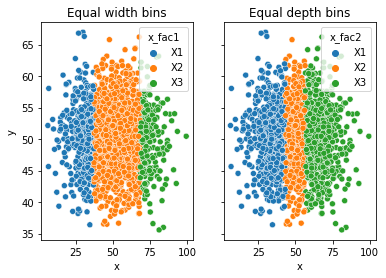

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

sns.scatterplot(data=df_normal,
                x="x",
                y="y",
                hue="x_fac1",
                ax=ax1)
ax1.set_title("Equal width bins")

sns.scatterplot(data=df_normal,
                x="x",
                y="y",
                hue="x_fac2",
                ax=ax2)
ax2.set_title("Equal depth bins");

The left scatterplot divides (denoted by change in hue/color) the range of x into three equally-spaced sections/bins, that is, along the x-axis. The right scatterplot, regardless of how wide (along the x-axis) that each colored bin is, has an equal (except some rounding error/off by 1) number of points. One can see that the blue and green bins are much wider because there are less points on the ends of a bell-curve/normal distribution curve, and the orange section, around the median, is narrower due to there being more points concentrated at the median within a normal distribution.